## MCIT - AWS Training Use Case 1

 <a name="0"> In this notebook, we build, train, and tune by:
- [__SVM__](https://scikit-learn.org/stable/modules/svm.html)
- [__KNN__](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

to predict the __target_label__.

1. <a href="#1">Problem Definition</a>
2. <a href="#2">Data Definition</a>
3. <a href="#3">Read the dataset</a>
4. <a href="#4">Exploratory Data Analysis(EDA)</a>
5. <a href="#5">Pre-Processing</a>
5. <a href="#6">Feature Engineering</a>
6. <a href="#7">Model Training</a>

### 1. <a name="1">Problem Definition</a>
(<a href="#0">Go to top</a>)

A bank has a customer data of the default payment he/she made.
We need to develope a model for predicting whether the customer will default the payment or not.

### 2. <a name="2">Data Definition</a>
(<a href="#0">Go to top</a>)

- X1: Amount of the given credit.
- X2: Gender (male; female).
- X3: Education (graduate school; university; high school; others).
- X4: Marital status (married; single; others).
- X5: Age (years).
- X6-X11: History of past payments.
 - Tracked past monthly payment records (from April to September, 2005) are displayed as follows:
   - X6 = the repayment status in September, 2005;
   - X7 = the repayment status in August, 2005
   - ...
   - X11 = the repayment status in April, 2005.
 - The measurement scale for the repayment status is:
   - -1 = pay duly;
   - 1 = payment delay for one month;
   - 2 = payment delay for two months
   - ...
   - 8 = payment delay for eight months;
   - 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement
 - X12 = amount of bill statement in September, 2005;
 - X13 = amount of bill statement in August, 2005
 - ...
 - X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment.
 - X18 = amount paid in September, 2005;
 - X19 = amount paid in August, 2005
 - ....
 - X23 = amount paid in April, 2005.
- Y: Did the person default? (Yes = 1, No = 0)


In [1]:
# Install & Upgrade Dependencies
!pip install --upgrade pip
!pip install --upgrade scikit-learn
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade xlrd

### 3. <a name="3">Read Dataset</a>
(<a href="#0">Go to top</a>)

In [2]:
import pandas as pd

dataset_path = 'default of credit card clients.xls'
df = pd.read_excel(dataset_path, header=1)

# Drop ID column
df.drop(['ID'], axis = 1, inplace=True)

In [3]:
print('Dataset Shape is:', df.shape)

Dataset Shape is: (30000, 24)


### 4. <a name="4">Exploratory Data Analysis(EDA)</a>
(<a href="#0">Go to top</a>)

We look at number of rows, columns and some simple statistics of the dataset.

In [4]:
# View dataframe content
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,male,graduate school,single,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,male,graduate school,single,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,female,university,single,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,female,others,married,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,male,high school,single,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [5]:
# Check data-types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   29669 non-null  object
 3   MARRIAGE                    29677 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [6]:
# Show dataset basic statistics
df.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.518833,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.528019,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Check if there are any duplicated data-points and drop them.

In [7]:
print('# of duplicated rows:', len(df[df.duplicated()]))

# of duplicated rows: 35


Check if there are any missing data.

In [8]:
df.isna().sum()

LIMIT_BAL                       0
SEX                             0
EDUCATION                     331
MARRIAGE                      323
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                       0
BILL_AMT2                       0
BILL_AMT3                       0
BILL_AMT4                       0
BILL_AMT5                       0
BILL_AMT6                       0
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

Check how many unique column values.

In [9]:
df.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         5
MARRIAGE                          3
AGE                              63
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

View numerical and categorical features.

In [10]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Numeric features
numeric_features = [
    'LIMIT_BAL',
    'AGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]

# Categorical features
categorical_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE'
]

# Label feature
label_feature = [ 'default payment next month' ]

In [12]:
# View numerical features values
df[numeric_features]

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [13]:
# View categorical features values
df[categorical_features]

,SEX,EDUCATION,MARRIAGE
0,female,university,married
1,female,university,single
2,female,university,single
3,female,university,married
4,male,university,married
...,...,...,...
29995,male,high school,married
29996,male,high school,single
29997,male,university,single
29998,male,high school,married


In [14]:
# View label feature values
df[label_feature]

,default payment next month
0,1
1,1
2,0
3,0
4,0
...,...
29995,0
29996,0
29997,1
29998,1


View correlation matrix of dataset features.

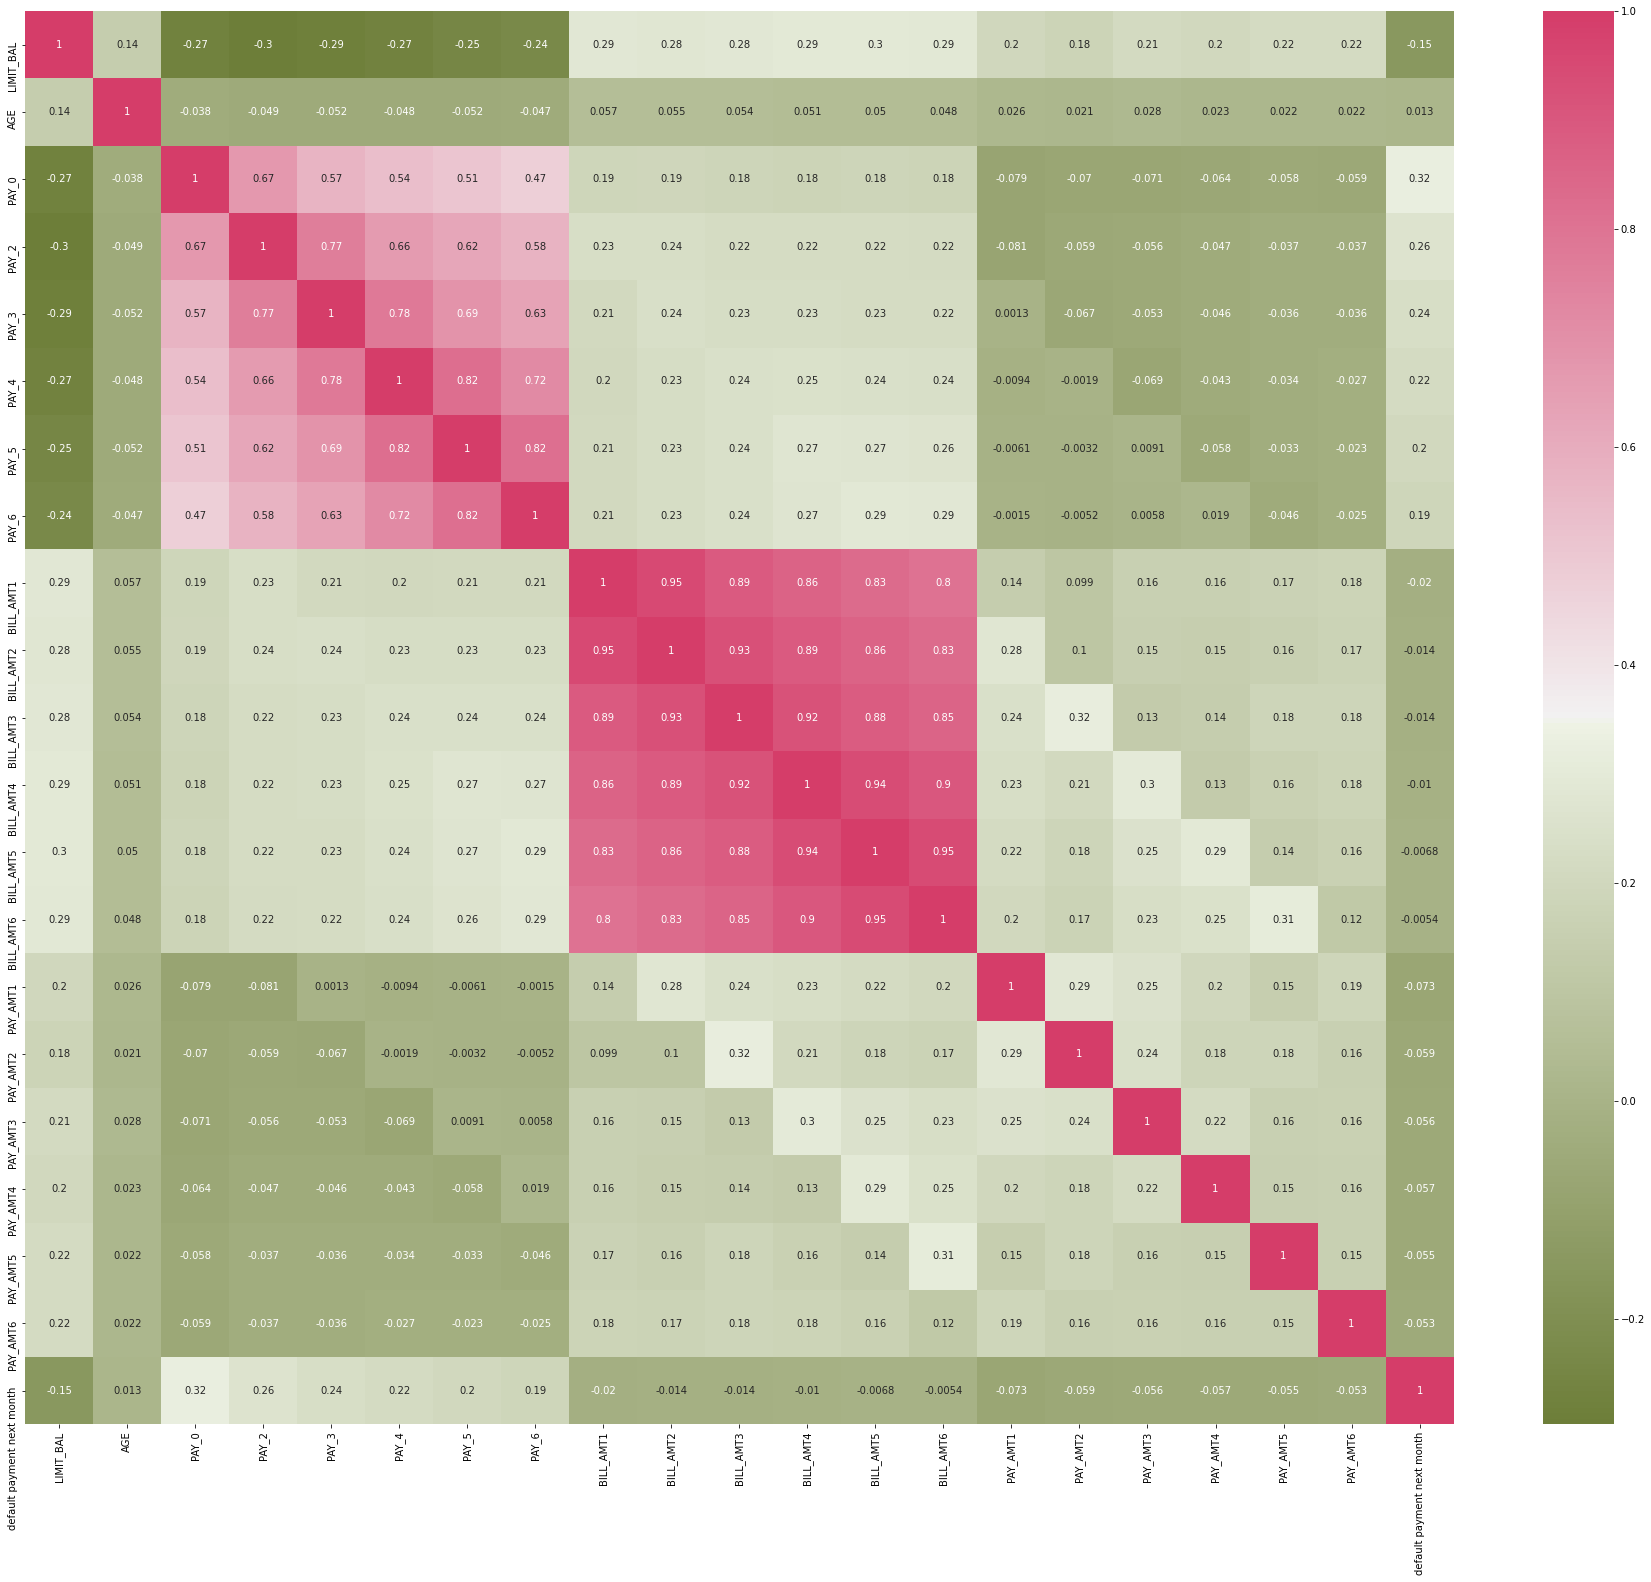

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

f = plt.subplots(figsize=(32, 26))

corr = df.corr()
mp = sns.heatmap(
    corr,
    cmap=sns.diverging_palette(100, 0, as_cmap=True),
    annot=True
)

View values count and histogram for every numerical feature.

In [16]:
for feature in numeric_features:
    print(feature)
    print(df[feature].value_counts(sort=False))
    print('\n')

LIMIT_BAL
327680       1
590000       6
230000     737
460000      80
100000    1048
          ... 
260000     521
490000      64
130000     729
720000       3
360000     881
Name: LIMIT_BAL, Length: 81, dtype: int64


AGE
32     1158
48      466
64       31
33     1146
49      451
       ... 
126       1
31     1217
47      501
63       31
79        1
Name: AGE, Length: 63, dtype: int64


PAY_0
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
-2     2759
-1     5686
Name: PAY_0, dtype: int64


PAY_2
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
-2     3782
-1     6050
Name: PAY_2, dtype: int64


PAY_3
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
-2     4085
-1     5938
Name: PAY_3, dtype: int64


PAY_4
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8     

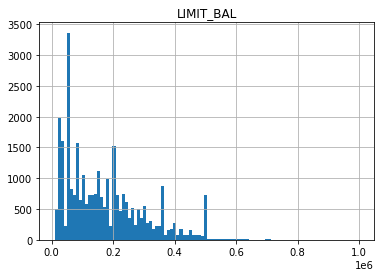

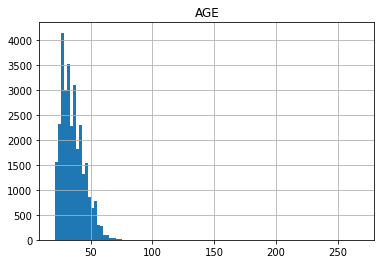

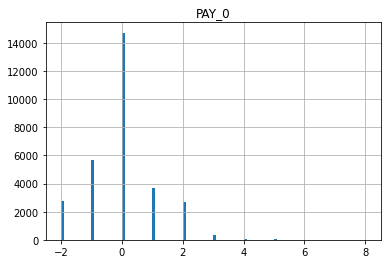

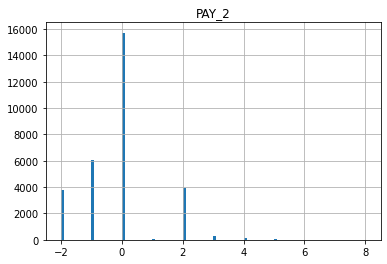

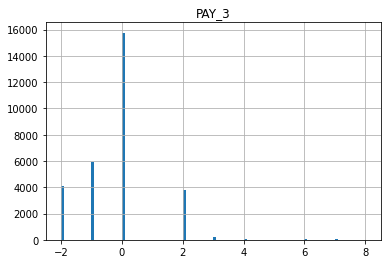

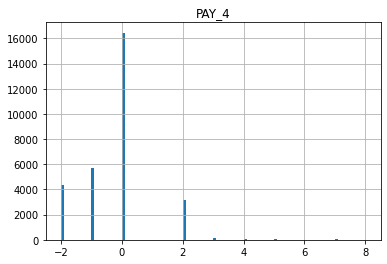

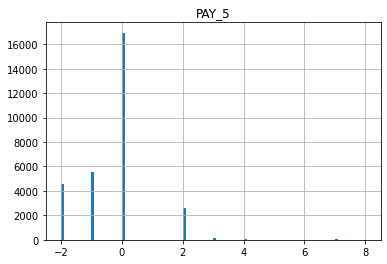

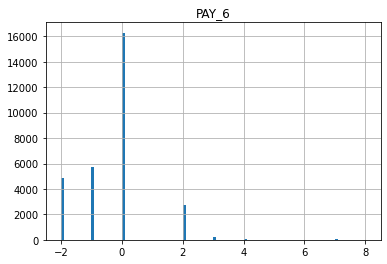

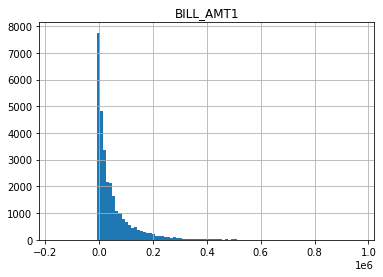

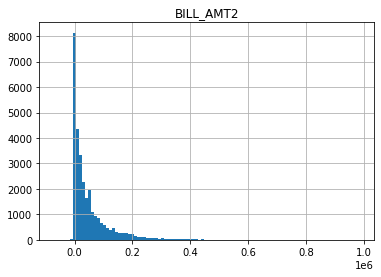

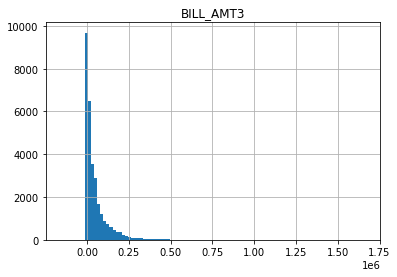

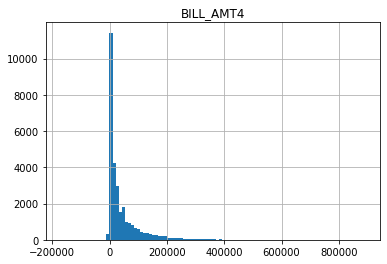

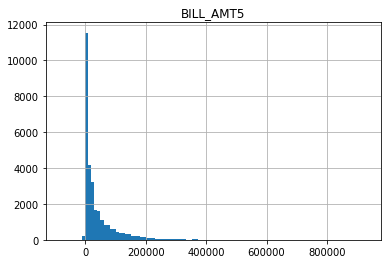

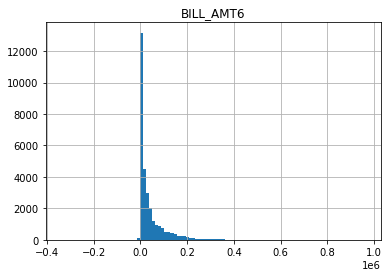

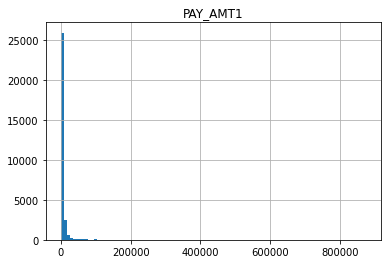

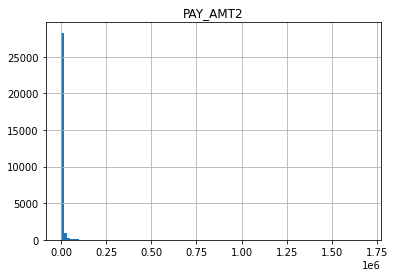

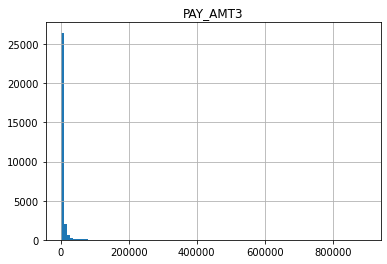

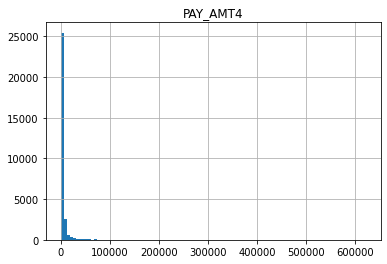

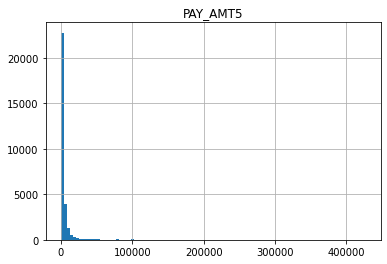

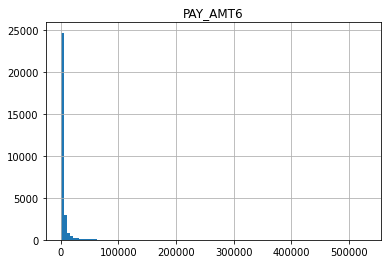

In [17]:
for feature in numeric_features:
    df.hist(column=feature, bins=100)

<AxesSubplot:xlabel='AGE'>

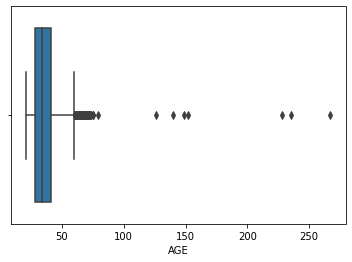

In [18]:
sns.boxplot(x=df['AGE'])

Check bais in categorical features.

In [19]:
for feature in categorical_features:
    print(feature)
    print(df[feature].value_counts(sort=True))
    print('\n')

SEX
female    18112
male      11888
Name: SEX, dtype: int64


EDUCATION
university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64


MARRIAGE
single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64




Check balanced dataset

In [20]:
for feature in label_feature:
    print(feature)
    print(df[feature].value_counts(sort=True))
    print('\n')

default payment next month
0    23364
1     6636
Name: default payment next month, dtype: int64




#### Summary

From the analysis we had above, we found a few things to be resolved/fixed:
- **Duplicates**: There are 35 duplicated rows.
- **Null/Missing**: There is some columns with null/missing values:
 - `EDUCATION` feature has 331 null values.
 - `MARRIAGE` feature has 323 null values.
- **Outliers**: There are some columns with invalid values:
 - `EDUCATION` feature has *0* values.
 - `MARRIAGE` feature has *0* values.
 - `AGE` feature has *>=100* values.
 - `PAY_X` features has *-2 & 0* values. Will not do anythingf about it.
 - `BILL_AMTX` features has negative values. Will not do anythingf about it.

### 5. <a name="5">Pre-Processing</a>
(<a href="#0">Go to top</a>)

Prepare/pre-process dataset features.

In [21]:
df_cleaned = df

Drop duplicated datapoints

In [22]:
df_cleaned.drop_duplicates(inplace=True)

Drop null/missing datapoints.

In [23]:
df_cleaned['EDUCATION'].fillna(df_cleaned['EDUCATION'].mode()[0], inplace=True)

In [24]:
df_cleaned['MARRIAGE'].fillna(df_cleaned['MARRIAGE'].mode()[0], inplace=True)

Fix outliers.

In [25]:
df_cleaned['EDUCATION'].replace(0, 'others', inplace = True)

In [26]:
df_cleaned['MARRIAGE'].replace(0, df_cleaned['MARRIAGE'].mode()[0], inplace=True)

In [27]:
df_cleaned.drop(df_cleaned[df_cleaned.AGE > 100].index, inplace=True)

### 6. <a name="6">Feature Engineering</a>
(<a href="#0">Go to top</a>)

- Categorical features need to have `One-Hot Encoding`
- Numerical features need to have `Normalization`.

In [28]:
df_engineered = df_cleaned

Make categorical features to be hot encoded

In [29]:
for feature in categorical_features:
    one_hot = pd.get_dummies(df_engineered[feature], prefix=feature)
    df_engineered.drop(feature, axis=1, inplace=True)
    df_engineered = df_engineered.join(one_hot)

Make numerical features become normalized.

In [30]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_engineered)
df_engineered = pd.DataFrame(x_scaled, columns=df_engineered.columns)

### 7. <a name="7">Model Training</a>
(<a href="#0">Go to top</a>)

1. Split dataset.
2. Traing machine learning models:
 - SVM
 - KNN
3. Evaluate models

#### 1. Split dataset
We split the dataset by:
- **85%** Train
- **15%** Test

In [31]:
from sklearn.model_selection import train_test_split

label = label_feature[0]

X_train, X_test, y_train, y_test = train_test_split(
    df_engineered.loc[:, df_engineered.columns != label],
    df_engineered[label],
    test_size=0.25,
    random_state=0,
    shuffle=True
)

#### 2. Train Models

SVM model.

In [32]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

Logistic Regression model.

In [33]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

/home/btengana/workspace/MCIT/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

KNN model.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

#### 3. Evaluate models

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

def evaluate_model(clf):
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    precision = precision_score(y_train, train_predictions, average='binary')
    print('Precision Train: %.3f' % precision)
    precision = precision_score(y_test, test_predictions, average='binary')
    print('Precision Test: %.3f' % precision)

    recall = recall_score(y_train, train_predictions, average='binary')
    print('Recall Train: %.3f' % recall)
    recall = recall_score(y_test, test_predictions, average='binary')
    print('Recall Test: %.3f' % recall)

    score = f1_score(y_train, train_predictions, average='binary')
    print('F-Measure Train: %.3f' % score)
    score = f1_score(y_test, test_predictions, average='binary')
    print('F-Measure Test: %.3f' % score)

    train_acc_score = accuracy_score(y_train, train_predictions)
    print('Accuracy Train: %.3f' % train_acc_score)
    test_acc_score = accuracy_score(y_test, test_predictions)
    print('Accuracy Test: %.3f' % test_acc_score)

SVM model evaluation.

In [36]:
evaluate_model(svm_clf)

Precision Train: 0.691
Precision Test: 0.665
Recall Train: 0.280
Recall Test: 0.280
F-Measure Train: 0.399
F-Measure Test: 0.394
Accuracy Train: 0.813
Accuracy Test: 0.810


Logistic Regression model evaluation.

In [37]:
evaluate_model(lr_clf)

Precision Train: 0.732
Precision Test: 0.692
Recall Train: 0.238
Recall Test: 0.233
F-Measure Train: 0.359
F-Measure Test: 0.349
Accuracy Train: 0.812
Accuracy Test: 0.808


KNN model evaluation.

In [38]:
evaluate_model(knn_clf)

Precision Train: 0.723
Precision Test: 0.543
Recall Train: 0.462
Recall Test: 0.345
F-Measure Train: 0.564
F-Measure Test: 0.422
Accuracy Train: 0.842
Accuracy Test: 0.792
